In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf

tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
sess = tf.InteractiveSession()

(1, 3, 3, 1)


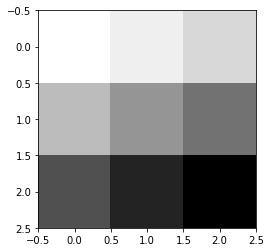

In [3]:
image = np.array([
    [
        [[1], [2], [3]],
        [[4], [5], [6]],
        [[7], [8], [9]]
    ]
], dtype=np.float32)
print(image.shape)
plt.imshow(image.reshape(3,3), cmap='Greys')

#### 설명
데이터의 행렬은 (n, i, j, c) 형태로 이루어져있다.

* n: 총 데이터의 개수
* i: 가로 축 픽셀의 데이터 
* j: 세로 축 픽셀의 데이터
* c: 해당 픽셀의 색상정보를 담고 있는 데이터이다. RGB 색상의 이미지인 경우 c의 값은 3이된다.


#### Convolution 실행하기

image shape: (1, 3, 3, 1)
weight shape: (2, 2, 1, 1)
conv2d_img.shape (1, 2, 2, 1)
[[12. 16.]
 [24. 28.]]


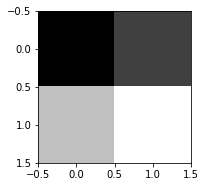

In [14]:
weight = tf.constant([
    [[[1.]], [[1.]]],
    [[[1.]], [[1.]]]
])
print("image shape:", image.shape)
print("weight shape:", weight.shape)

conv2d = tf.nn.conv2d(image, weight, strides=[1,1,1,1], padding='VALID')
conv2d_img = conv2d.eval()
print("conv2d_img.shape", conv2d_img.shape)

conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(2,2))
    plt.subplot(1,2,i+1), plt.imshow(one_img.reshape(2,2), cmap='gray')

conv2d 연산 수행의 padding을 **'SAME'** 으로 설정하면 입력한 이미지의 크기와 똑같은 크기의 출력 값이 나온다

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 1)
conv2d_img.shape (1, 3, 3, 1)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]


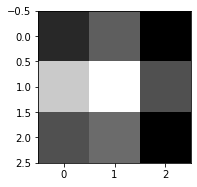

In [13]:
print("image.shape", image.shape)
weight = tf.constant([
    [[[1.]], [[1.]]],
    [[[1.]], [[1.]]]
])
print("weight.shape", weight.shape)

conv2d = tf.nn.conv2d(image, weight, strides=[1,1,1,1], padding='SAME')
conv2d_img = conv2d.eval()
print("conv2d_img.shape", conv2d_img.shape)

conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3,3))
    plt.subplot(1,2,i+1), plt.imshow(one_img.reshape(3,3), cmap='gray')

이번에는 필터를 여러개 생성하여 사용하는 경우 텐서플로우에서 처리하는 방법에 대해 다룬다

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 3)
conv2d_img.shape (1, 3, 3, 3)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]
[[120. 160.  90.]
 [240. 280. 150.]
 [150. 170.  90.]]
[[-12. -16.  -9.]
 [-24. -28. -15.]
 [-15. -17.  -9.]]


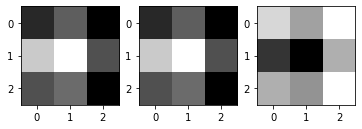

In [20]:
print("image.shape", image.shape)

weight = tf.constant([
    [[[1.,10.,-1]],[[1.,10.,-1]]],
    [[[1., 10.,-1.]], [[1.,10.,-1]]]
])
print("weight.shape", weight.shape)

conv2d = tf.nn.conv2d(image, weight, strides=[1,1,1,1], padding='SAME')
conv2d_img = conv2d.eval()
print("conv2d_img.shape", conv2d_img.shape)

conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3,3))
    plt.subplot(1,3,i+1)
    plt.imshow(one_img.reshape(3,3), cmap='gray')

이번에는 MaxPooling을 수행하는 방법에 대해 설명한다.

In [24]:
image = np.array([
    [
        [[4], [3]],
        [[2], [1]]
    ]
], dtype=np.float32)

pool = tf.nn.max_pool(image, ksize=[1,2,2,1], strides=[1,1,1,1], padding='SAME')
print(pool.shape)
print(pool.eval())

(1, 2, 2, 1)
[[[[4.]
   [3.]]

  [[2.]
   [1.]]]]
